# 朴素贝叶斯

In [ ]:
# 例如：
# 现分别有 A、B 两个容器，
# 在容器 A 里分别有 7 个红球和 3 个白球，
# 在容器 B 里有 1 个红球和 9 个白球，
# 现已知从这两个容器里任意抽出了一个球，且是红球，
# 问这个红球是来自容器 A 的概率是多少?
# 假设已经抽出红球为事件 B，选中容器 A 为事件 A，则有：P(B) = 8/20，P(A) = 1/2，P(B|A) = 7/10，按照公式，则有：P(A|B) = (7/10)*(1/2) / (8/20) = 0.875


In [1]:
# 抽出来的球是红球 是 B   P(B)= 8 / 20
# 抽出来的球是从A容器中抽出来的 是 A   P(A)= 1/2
# 已经确定了 求是从A容器中取出来的 此时 红球的概率 P(B|A) 
# 其实就是从A容器中取出红球的概率   P(B|A) = 7/10

# 则 问 已经知道这个球是红球 这个红球是从容器A中取出来的 的 概率 P(A|B) = P(B|A)*P(A)/P(B)
# P(A|B) = P(B|A)*P(A)/P(B)
(7/10)*(1/2)/(8/20)

0.8749999999999999

In [2]:
7/8

0.875

In [ ]:
# 已知 抽出来的球是红球 问 这个红球来自A容器的概率

In [ ]:
# 一座别墅在过去的 20 年里一共发生过 2 次被盗，
# 别墅的主人有一条狗，狗平均每周晚上叫 3 次，
# 在盗贼入侵时狗叫的概率被估计为 0.9，
# 问题是：在狗叫的时候发生入侵的概率是多少？
# 我们假设 A 事件为狗在晚上叫，B 为盗贼入侵，则以天为单位统计，P(A) = 3/7，P(B) = 2/(20*365) = 2/7300，P(A|B) = 0.9，按照公式很容易得出结果：P(B|A) = 0.9*(2/7300) / (3/7) = 0.00058


In [3]:
# A 事件为狗在晚上叫  P(A) = 3/7
# B 为盗贼入侵  P(B) = 2 / (20*365)
# P(A|B) = 0.9
# 狗叫了 发生 盗贼 入侵 的 概率 P(B|A) = P(A|B)*P(B)/P(A)
(9/10)*(2/(20*365))/(3/7)

0.0005753424657534247

## 【关键词】

- 朴素：独立性假设
- 贝叶斯公式

优点：
- 朴素贝叶斯模型发源于古典数学理论，有着坚实的数学基础，以及稳定的分类效率；
- 对小规模的数据表现很好；
- 能处理多分类任务，适合增量式训练；
- 对缺失数据不太敏感，算法也比较简单，常用于文本分类

缺点：
- 只能用于分类问题
- 需要计算先验概率；
- 分类决策存在错误率；
- 对输入数据的表达形式很敏感

## 一、朴素贝叶斯原理

In [ ]:
# 已经确定了 上了数学课 去 的概率
P(Y=去|常微分方程) = P(Y=常微分方程|去)*P(去)/P(常微分方程)
P(Y=不去|常微分方程) = P(Y=常微分方程|不去)*P(不去)/P(常微分方程)
# 所以 就 变成了 
# 统计之前 (去的情况下 头一天是上了数学课的概率)*(女生去自习的概率)/(平时上数学课的概率)
# 统计之前 (不去的情况下 头一天是上了数学课的概率)*(女生不去自习的概率)/(平时上数学课的概率)
# (去的情况下 头一天是上了数学课的概率)*(女生去自习的概率) ?? (不去的情况下 头一天是上了数学课的概率)*(女生不去自习的概率)

朴素贝叶斯算法是一个典型的统计学习方法，主要理论基础就是一个贝叶斯公式，贝叶斯公式的基本定义如下：

![](./img/1.jpg)

这个公式虽然看上去简单，但它却能总结历史，预知未来：
- 公式的右边是总结历史
- 公式的左边是预知未来

如果把Y看成类别，X看成特征，P(Yk|X)就是在已知特征X的情况下求Yk类别的概率，而对P(Yk|X)的计算又全部转化到类别Yk的特征分布上来。

举个例子，大学的时候，某男生经常去图书室晚自习，发现他喜欢的那个女生也常去那个自习室，心中窃喜，于是每天买点好吃点在那个自习室蹲点等她来，可是人家女生不一定每天都来，眼看天气渐渐炎热，图书馆又不开空调，如果那个女生没有去自习室，该男生也就不去，每次男生鼓足勇气说：“嘿，你明天还来不？”,“啊，不知道，看情况”。

然后该男生每天就把她去自习室与否以及一些其他情况做一下记录，用Y表示该女生是否去自习室，即Y={去，不去}，X是跟去自习室有关联的一系列条件，比如当天上了哪门主课，蹲点统计了一段时间后，该男生打算今天不再蹲点，而是先预测一下她会不会去，现在已经知道了今天上了常微分方法这么主课，于是计算P(Y=去|常微分方程)与P(Y=不去|常微分方程)，看哪个概率大，如果P(Y=去|常微分方程) >P(Y=不去|常微分方程)，那这个男生不管多热都屁颠屁颠去自习室了，否则不就去自习室受罪了。P(Y=去|常微分方程)的计算可以转为计算以前她去的情况下，那天主课是常微分的概率P(常微分方程|Y=去)，注意公式右边的分母对每个类别（去/不去）都是一样的，所以计算的时候忽略掉分母，这样虽然得到的概率值已经不再是0~1之间，但是通过比较大小还是能选择类别。

后来他发现还有一些其他条件可以挖，比如当天星期几、当天的天气，以及上一次与她在自修室的气氛，统计了一段时间后，该男子一计算，发现不好算了，因为总结历史的公式：

![2.jpg](./img/2.jpg)

这里n=4，x(1)表示主课，x(2)表示天气，x(3)表示星期几，x(4)表示气氛，Y仍然是{去，不去}，现在主课有8门，天气有晴、雨、阴三种、气氛有A+,A,B+,B，C五种，那么总共需要估计的参数有8×3×7×5×2=1680个，每天只能收集到一条数据，那么等凑齐1680条数据，大学都毕业了，男生大呼不妙，于是做了一个独立性假设，假设这些影响她去自习室的原因是独立互不相关的，于是：

![3.jpg](./img/3.jpg)

有了这个独立假设后，需要估计的参数就变为，(8+3+7+5)×2 = 46个了，而且每天收集的一条数据，可以提供4个参数，这样该男生就预测越来越准了。


朴素的概念：独立性假设，假设各个特征之间是独立不相关的（这一点对于自然语言处理非常重要）。

In [ ]:
# 这是 一句 很 简单 的 话
# 100000 * 100000 .. 1000
# 引入独立性假设之后 虽然 预测结果不如以前准确了 但是至少 计算机可以处理了
# 朴素贝叶斯 主要就 是 用来做 自然语言处理的

# 什么是贝叶斯
# 什么是朴素贝叶斯
# 朴素贝叶斯主要用在哪里


## 二、3种贝叶斯模型

### 1、高斯分布朴素贝叶斯

高斯分布就是正态分布

【用途】用于一般分类问题（两种类型的分布差异明显时适合使用）

使用自带的鸢尾花数据

In [4]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [5]:
from sklearn.datasets import load_iris

In [7]:
iris =load_iris()

先取前面两个特征看看分类效果

In [9]:
# 只取前两个特征
data = iris.data[:,:2]  # 所有行 前两列  特征值
target = iris.target  # 目标值

In [11]:
import matplotlib.pyplot as plt

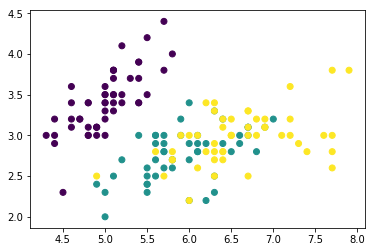

In [13]:
plt.scatter(data[:,0],data[:,1],c=target)

In [15]:
# 使用 高斯朴素贝叶斯 进行分类
gnb = GaussianNB()  # 调用构造函数 获取模型

In [16]:
# 训练模型
gnb.fit(data,target)

GaussianNB(priors=None)

In [19]:
import numpy as np

In [24]:
# 接下来要预测了 （需要测试数据） (使用整个画布上的点 作为测试数据)
x = np.linspace(data[:,0].min(),data[:,0].max(),100)
y = np.linspace(data[:,1].min(),data[:,1].max(),100)
xx,yy = np.meshgrid(x,y)
X_test = np.c_[xx.flatten(),yy.flatten()]
X_test

array([[4.3       , 2.        ],
       [4.33636364, 2.        ],
       [4.37272727, 2.        ],
       ...,
       [7.82727273, 4.4       ],
       [7.86363636, 4.4       ],
       [7.9       , 4.4       ]])

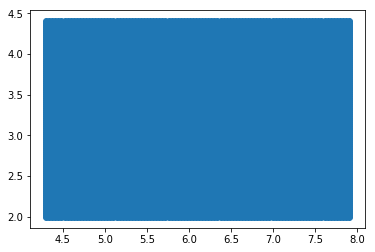

In [32]:
plt.scatter(X_test[:,0],X_test[:,1])

In [28]:
y_ =gnb.predict(X_test)

In [34]:
from matplotlib.colors import ListedColormap
cmap1 =ListedColormap(['r','g','b'])

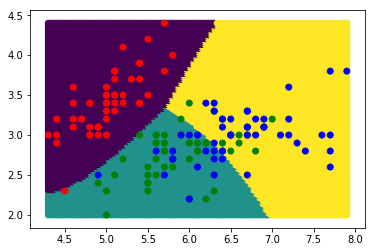

In [35]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_)
plt.scatter(data[:,0],data[:,1],c=target,cmap=cmap1)

In [ ]:
# gnb 高斯朴素贝叶斯 一般是用来对 符合正态分布的 数据 进行分类的
# 这类数据 的分布 一般是 中间多 周围少

简单看看分类的准确率

In [ ]:
# 刚才 是需要绘图 给大家展示效果 所以只取了两个特征
# 接下来真正要分类了 所有的特征都取
# 并且要 把 数据集 分成 训练集 和 测试集

In [39]:
data = iris.data
target = iris.target
target.shape

(150,)

In [41]:
# 有专门切分训练集测试集 并且打乱顺序的 包
from sklearn.model_selection import train_test_split

In [45]:
#  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(data,target,test_size=0.2)

In [46]:
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB(priors=None)

In [47]:
gnb.score(X_test,y_test)

0.9666666666666667

### 2、多项式分布朴素贝叶斯

【用途】适用于文本数据（特征表示的是次数，例如某个词语的出现次数）

### 3、伯努利分布朴素贝叶斯

【用途】适用于伯努利分布，也适用于文本数据（此时特征表示的是是否出现，例如某个词语的出现为1，不出现为0）

绝大多数情况下表现不如多项式分布，但有的时候伯努利分布表现得要比多项式分布要好，尤其是对于小数量级的文本数据

## 三、文本分类实战

对短信进行二分类，数据为SMSSpamCollection

In [49]:
import pandas as pd
from pandas import Series,DataFrame

In [ ]:
# spam是垃圾邮件 ham是正常邮件

In [54]:
# 最开始的一列 不是列索引 要设置header=None
df = pd.read_table('./data/SMSSpamCollection.tsv',header=None)
df

,0,1
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [57]:
data = df[1]  # 内容 （特征值）
target = df[0]  # 目标值
data.shape
target.shape

(5572,)

In [ ]:
# 使用机器学习模型 对 邮件进行分类


In [58]:
# 获取模型
mnb = MultinomialNB()


In [103]:
bnb = BernoulliNB()

In [61]:
# 训练模型
# 注意： 不能直接用文本内容去训练机器学习模型
# mnb.fit(data,target)  # 机器学习模型 肯定无法直接对 文本信息进行学习 
# 我们需要对文本信息 进行特征值抽取
# 最后是使用文本的特征值 对 机器学习模型 进行训练

导包  
导入sklearn.feature_extraction.text.TfidfVectorizer用于转换字符串  
读取短信数据

In [62]:
# feature_extraction 特征抽取
# text 文本特征的抽取
# TfidfVectorizer
# Tfidf tf idf
# tf term frequency 词频 词语在文章中出现的频率
# idf inverse document frequency 逆文档频率
# Tfidf 其实就是 某个次在当前文章中出现的频率/这个词语在所有文章中出现的频率
from sklearn.feature_extraction.text import TfidfVectorizer

In [63]:
tf = TfidfVectorizer()  # 用来抽取文章的特征

In [64]:
tf.fit(data)  # 对所有内容进行学习

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

#### tf.fit_transform()

- 参数必须是字符串的一维数组（比如列表或者Series）
- 返回的是一个稀疏矩阵类型的对象，行数为样本数，列数为所有出现的单词统计个数。

这里输入data[1]是Series类型，返回的是一个5572x8713 sparse matrix 
其中5572是data[1]

In [66]:
# 接下来不是预测 而是 对要进行 特征抽取的文件 进行特征抽取
data_tf = tf.transform(data)

In [68]:
data.shape

(5572,)

In [70]:
data_tf.shape

(5572, 8713)

训练数据

In [71]:
# 接下来 就是 使用 抽取特征后的 数据 对机器学习模型进行 训练了
mnb.fit(data_tf,target)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [104]:
bnb.fit(data_tf,target)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

预测数据，使用tf.transform(['xx'])进行转换生成测试数据 传入的数据可以是一个列表，列表中装各个内容

In [100]:
# 我们自己写几个
X_test= [
    'I love you',
    'Please call our customer service as you have WON £1000 cash prize!',
    'Dear customer, welcome to the UAE and thank you for choosing du',
    'Congratulations, you won a prize',
    'We will reply to your inquiry within the next two business days.',
    'this is a spam',
    'prize and cash',
    'Sign up to 3Plus for a chance to win your dream trip for two'
]

In [101]:
# 对 测试数据进行 处理
X_test_tf = tf.transform(X_test)  # 这里可以直接传入一个列表 列表中是各个文档内容

In [106]:
# 注意： 预测的时候 也是先要把 测试文档的特征抽取出来 然后 让机器学习模型去预测
mnb.predict(X_test_tf)  # 数据量大的情况下 肯定是 多项式朴素贝叶斯更好 （数据量小的情况下 有可能伯努利效果更好 只是可能）

array(['ham', 'spam', 'ham', 'spam', 'ham', 'ham', 'spam', 'ham'],
      dtype='<U4')

In [105]:
bnb.predict(X_test_tf)

array(['ham', 'spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham'],
      dtype='<U4')

## 四、垃圾邮件分类

#### 对email进行二分类，两种邮件分别在ham和spam目录下

读取文件用open(file_path,encoding = 'gbk',errors='ignore').read()

In [108]:
# 先尝试着 读取一个
file_path = './data/email/ham/1.txt'
open(file_path).read()

'Hi Peter,\n\nWith Jose out of town, do you want to\nmeet once in a while to keep things\ngoing and do some interesting stuff?\n\nLet me know\nEugene'

In [118]:
ham = []
# ham 目录下的25个都读取
for i in range(1,26):
    file_path = './data/email/ham/%d.txt'%(i)
    # print(file_path)
    data = open(file_path,encoding='gbk',errors='ignore').read()
    ham.append([data,'ham'])

In [122]:
df1 = DataFrame(ham)

In [120]:
spam = []
# ham 目录下的25个都读取
for i in range(1,26):
    file_path = './data/email/spam/%d.txt'%(i)
    # print(file_path)
    data = open(file_path,encoding='gbk',errors='ignore').read()
    spam.append([data,'spam'])

In [123]:
df2 = DataFrame(spam)

In [125]:
df = pd.concat([df1,df2])

In [126]:
df

,0,1
0,"Hi Peter,\n\nWith Jose out of town, do you wan...",ham
1,Yay to you both doing fine!\n\nI'm working on ...,ham
2,WHat is going on there?\nI talked to John on e...,ham
3,Yo. I've been working on my running website. ...,ham
4,There was a guy at the gas station who told me...,ham
5,"Hello,\n\nSince you are an owner of at least o...",ham
6,Zach Hamm commented on your status.\n\nZach wr...,ham
7,This e-mail was sent from a notification-only ...,ham
8,"Hi Peter,\n\nThese are the only good scenic on...",ham
9,Ryan Whybrew commented on your status.\n\nRyan...,ham


In [131]:
# 先对数据 整体 进行 处理 抽取特征
tf = TfidfVectorizer()  # 调用构造函数 获取模型

In [ ]:
tf.fit(df[0])  # 需要传入一个一维的数组 或者是 Series

In [ ]:
tf.transform(df[0])

In [133]:
data_tf = tf.fit_transform(df[0])  # 如果 训练 和 转换 用的是一个数据集 直接使用fit_transform即可

In [ ]:
# 上面是把所有 文本内容 变成 特征

In [148]:
# 然后 一部分作测试 一部分做训练 而且打乱顺序
X_train, X_test, y_train, y_test = train_test_split(data_tf,df[1],test_size=0.25)
# 特征值是 data_tf 也就是 抽取了特征后的文本信息
# 目标值是 df里1那一列 也就是 标记的 ham和spam
# test_size是切分的比列

In [ ]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
# 使用机器学习模型 进行训练

In [149]:
mnb = MultinomialNB()

In [150]:
mnb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [151]:
mnb.score(X_test,y_test)

0.9230769230769231

In [152]:
bnb = BernoulliNB()

In [153]:
bnb.fit(X_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [154]:
bnb.score(X_test,y_test)

0.9230769230769231